In [1]:
import pandas as pd
import numpy as np



In [2]:
my_list = !ls
print(my_list)

['sample_data\t    TX_STAID000164.txt\tTX_STAID000347.txt  TX_STAID000709.txt', 'TX_STAID000002.txt  TX_STAID000166.txt\tTX_STAID000348.txt  TX_STAID000713.txt', 'TX_STAID000004.txt  TX_STAID000167.txt\tTX_STAID000349.txt  TX_STAID000714.txt', 'TX_STAID000005.txt  TX_STAID000168.txt\tTX_STAID000350.txt  TX_STAID000715.txt', 'TX_STAID000006.txt  TX_STAID000169.txt\tTX_STAID000351.txt  TX_STAID000716.txt', 'TX_STAID000007.txt  TX_STAID000173.txt\tTX_STAID000352.txt  TX_STAID000718.txt', 'TX_STAID000008.txt  TX_STAID000174.txt\tTX_STAID000354.txt  TX_STAID000719.txt', 'TX_STAID000010.txt  TX_STAID000175.txt\tTX_STAID000356.txt  TX_STAID000722.txt', 'TX_STAID000011.txt  TX_STAID000176.txt\tTX_STAID000383.txt  TX_STAID000725.txt', 'TX_STAID000012.txt  TX_STAID000177.txt\tTX_STAID000386.txt  TX_STAID000726.txt', 'TX_STAID000013.txt  TX_STAID000179.txt\tTX_STAID000388.txt  TX_STAID000729.txt', 'TX_STAID000014.txt  TX_STAID000185.txt\tTX_STAID000389.txt  TX_STAID000730.txt', 'TX_STAID000015.tx

In [3]:

file_list = []
for l in my_list:
  l= l.replace('\t', '  ')
  file_list.extend(l.split('  '))


In [4]:
print(file_list)

['sample_data', '', '', 'TX_STAID000164.txt', 'TX_STAID000347.txt', 'TX_STAID000709.txt', 'TX_STAID000002.txt', 'TX_STAID000166.txt', 'TX_STAID000348.txt', 'TX_STAID000713.txt', 'TX_STAID000004.txt', 'TX_STAID000167.txt', 'TX_STAID000349.txt', 'TX_STAID000714.txt', 'TX_STAID000005.txt', 'TX_STAID000168.txt', 'TX_STAID000350.txt', 'TX_STAID000715.txt', 'TX_STAID000006.txt', 'TX_STAID000169.txt', 'TX_STAID000351.txt', 'TX_STAID000716.txt', 'TX_STAID000007.txt', 'TX_STAID000173.txt', 'TX_STAID000352.txt', 'TX_STAID000718.txt', 'TX_STAID000008.txt', 'TX_STAID000174.txt', 'TX_STAID000354.txt', 'TX_STAID000719.txt', 'TX_STAID000010.txt', 'TX_STAID000175.txt', 'TX_STAID000356.txt', 'TX_STAID000722.txt', 'TX_STAID000011.txt', 'TX_STAID000176.txt', 'TX_STAID000383.txt', 'TX_STAID000725.txt', 'TX_STAID000012.txt', 'TX_STAID000177.txt', 'TX_STAID000386.txt', 'TX_STAID000726.txt', 'TX_STAID000013.txt', 'TX_STAID000179.txt', 'TX_STAID000388.txt', 'TX_STAID000729.txt', 'TX_STAID000014.txt', 'TX_STAI

In [5]:
# read file and clean column labels
def read_tidy(path):
  '''
  takes a path to a data file, reads and tidies
  returns data frame with clean labels
  '''
  df = pd.read_csv(path, delimiter=',',skiprows=range(0,19), parse_dates=['    DATE'])
  df.columns = df.columns.str.strip()
  df['month'] = df['DATE'].dt.month
  df['TX']=df['TX']*0.1
  df.loc[df['TX']<=-50, ['TX']] = np.nan

  return df

In [6]:
def detect_heatwave(df):
  '''
  detects periods of at least 5 days where
  max temperatures were at least 5 degrees higher than max avg
  '''
  df.reset_index(inplace=True)
  hot_days = pd.DataFrame()
  heatwave = pd.DataFrame()
  for index, row in df.iterrows():
    if (row['diff']>=5) & (row['TX_x']>=30):
      hot_days = pd.concat([hot_days, df.iloc[[index]]], ignore_index=True)
    else:
      if len(hot_days)>=5:
        heatwave = pd.concat([heatwave, hot_days], ignore_index=True)
      hot_days = pd.DataFrame()
  return heatwave

In [7]:
file_list = file_list[3:]
print(file_list)


['TX_STAID000164.txt', 'TX_STAID000347.txt', 'TX_STAID000709.txt', 'TX_STAID000002.txt', 'TX_STAID000166.txt', 'TX_STAID000348.txt', 'TX_STAID000713.txt', 'TX_STAID000004.txt', 'TX_STAID000167.txt', 'TX_STAID000349.txt', 'TX_STAID000714.txt', 'TX_STAID000005.txt', 'TX_STAID000168.txt', 'TX_STAID000350.txt', 'TX_STAID000715.txt', 'TX_STAID000006.txt', 'TX_STAID000169.txt', 'TX_STAID000351.txt', 'TX_STAID000716.txt', 'TX_STAID000007.txt', 'TX_STAID000173.txt', 'TX_STAID000352.txt', 'TX_STAID000718.txt', 'TX_STAID000008.txt', 'TX_STAID000174.txt', 'TX_STAID000354.txt', 'TX_STAID000719.txt', 'TX_STAID000010.txt', 'TX_STAID000175.txt', 'TX_STAID000356.txt', 'TX_STAID000722.txt', 'TX_STAID000011.txt', 'TX_STAID000176.txt', 'TX_STAID000383.txt', 'TX_STAID000725.txt', 'TX_STAID000012.txt', 'TX_STAID000177.txt', 'TX_STAID000386.txt', 'TX_STAID000726.txt', 'TX_STAID000013.txt', 'TX_STAID000179.txt', 'TX_STAID000388.txt', 'TX_STAID000729.txt', 'TX_STAID000014.txt', 'TX_STAID000185.txt', 'TX_STAID

In [8]:
heatwaves_df = pd.DataFrame()

for file_path in file_list:
  file_path = '/content/' + file_path
  df = read_tidy(file_path)
  period = df[(df['DATE']>='1961-01-01') & (df['DATE']<='1991-12-31')]
  avg = period.groupby('month')['TX'].mean()
  avg = pd.DataFrame(avg)
  avg = avg.reset_index(level = 0)
  temp_with_avg = df.merge(avg, how='outer', on='month')
  temp_with_avg['diff'] = temp_with_avg['TX_x'] -temp_with_avg['TX_y']
  hw = detect_heatwave(temp_with_avg)
  heatwaves_df = pd.concat([heatwaves_df, hw], ignore_index=True)

In [9]:
heatwaves_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45579 entries, 0 to 45578
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   45579 non-null  int64         
 1   STAID   45579 non-null  int64         
 2   SOUID   45579 non-null  int64         
 3   DATE    45579 non-null  datetime64[ns]
 4   TX_x    45579 non-null  float64       
 5   Q_TX    45579 non-null  int64         
 6   month   45579 non-null  int64         
 7   TX_y    45579 non-null  float64       
 8   diff    45579 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 3.1 MB


In [10]:
heatwaves_df['year'] = heatwaves_df['DATE'].dt.year

In [11]:
heatwaves_df.head(10)

,index,STAID,SOUID,DATE,TX_x,Q_TX,month,TX_y,diff,year
0,14322,164,530,1923-07-10,31.9,-9,7,20.747555,11.152445,1923
1,14323,164,530,1923-07-11,31.5,-9,7,20.747555,10.752445,1923
2,14324,164,530,1923-07-12,31.6,-9,7,20.747555,10.852445,1923
3,14325,164,530,1923-07-13,33.4,-9,7,20.747555,12.652445,1923
4,14326,164,530,1923-07-14,32.6,-9,7,20.747555,11.852445,1923
5,14877,164,530,1941-07-07,31.3,-9,7,20.747555,10.552445,1941
6,14878,164,530,1941-07-08,30.6,-9,7,20.747555,9.852445,1941
7,14879,164,530,1941-07-09,32.3,-9,7,20.747555,11.552445,1941
8,14880,164,530,1941-07-10,33.3,-9,7,20.747555,12.552445,1941
9,14881,164,530,1941-07-11,32.2,-9,7,20.747555,11.452445,1941


In [12]:
heatdays_year = heatwaves_df.groupby('year')['DATE'].nunique()

In [13]:
heatdays_year = pd.DataFrame(heatdays_year)
heatdays_year.head()

,DATE
year,
1818,5
1822,13
1828,5
1830,11
1834,30


In [14]:
import matplotlib.pyplot as plt


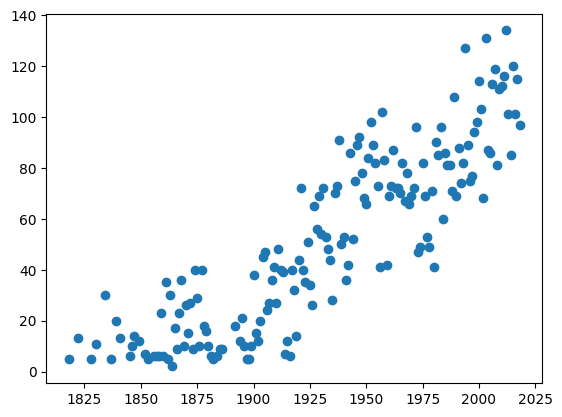

In [15]:
plt.scatter(x=heatdays_year.index, y=heatdays_year['DATE'])
plt.show()

In [16]:
X = np.array(heatdays_year.index)
y = heatdays_year['DATE']
X= X.reshape(-1,1)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [18]:
X_pred = np.arange(1850, 2123).reshape(-1,1)
y_pred = model.predict(X_pred)

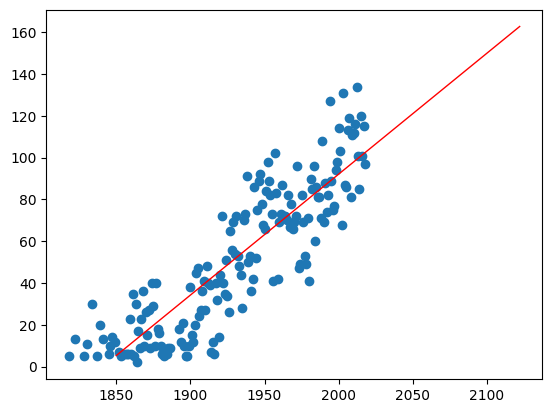

In [21]:
plt.scatter(x=heatdays_year.index, y=heatdays_year['DATE'])
plt.plot(X_pred, y_pred, color="red", linewidth=1)

plt.show()

In [22]:
heatwaves_df.to_csv('/content/heatwaves.csv')

In [30]:
heatdays_year.head()

,DATE
year,
1818,5
1822,13
1828,5
1830,11
1834,30
